In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'svg'

In [2]:
start, end, flux, error = np.loadtxt("Circinus_X-1_2.0-10.0keV_gsclc.txt", unpack=True)
print (start, end, flux, error)

[55238.784919 55260.012078 55260.520637 ... 60770.101539 60770.553275
 56322.833493] [58969.561034 55260.205758 55260.967975 ... 60770.491551 60770.878762
 60813.759468] [ 0.02087  -0.00581   0.010644 ...  2.476295  2.14389   0.989813] [0.001319 0.011929 0.008129 ... 0.058702 0.059295 0.004368]


## Ephemeris

Phases: [0.85088472 0.1354424  0.16621785 ... 0.8162721  0.84364793 0.46090345]


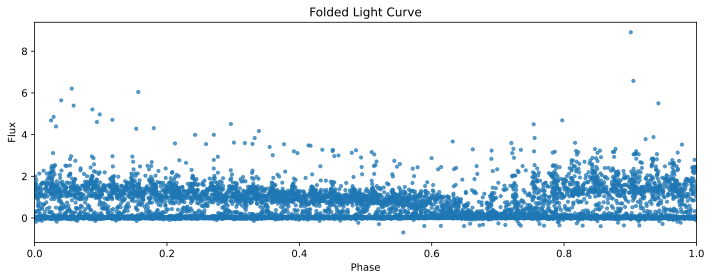

#### DATA SHAPE: (8747, 5)


In [3]:
def mjd_to_phase (

    MJD_n,
    MJD_0 = 50082.04,
    P = 16.54694,
    P_0 = 3.53e-5
):
    MJD_n = np.atleast_1d(MJD_n).astype(float).ravel()
    
    delta = MJD_n - MJD_0
    #discriminant:
    discriminant = (P)**2 - 4*P_0*delta

    if np.any(discriminant < 0):
        raise ValueError("Discriminant is less than 0 (negative), so cannot take the square root.")

    square_root = np.sqrt(discriminant)

    #two roots:
    N1 = (P - square_root)/(2*P_0)
    N2 = (P - square_root)/(2*P_0)
    bpos = N1 > 0
    N = np.copy(N2)
    N[bpos] = N1[bpos]

    #orbital phase:
    phase = N - np.floor(N)
    return phase

phase = mjd_to_phase(start)

print ("Phases:", phase)

#Plotting Flux vs. Phase:
plt.figure(figsize=(10,4))
plt.scatter(phase, flux, s=10, alpha=0.7) 
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.title('Folded Light Curve')
plt.xlim(0,1)

#Saving Flux vs. Phase as a pdf:
plt.tight_layout()
plt.savefig('REVISED_Cir_X-1_2-10keV_PHASE.pdf',bbox_inches='tight') 
plt.show()


#Saving all the data as a txt file:
data = np.column_stack([
    np.atleast_1d(start).ravel(),
    np.atleast_1d(end).ravel(),
    np.atleast_1d(flux).ravel(),
    np.atleast_1d(error).ravel(),
    phase
])

np.savetxt(
    'REVISED_phase_2-10keV.txt',
    data,
    fmt=['%.5f','%.5f','%.6e','%.6e','%.6f'],
    header=('# Col 1: start MJD  Col 2: end MJD'
            '  Col 3: Flux  Col 4: Uncertainty'
            '  Col 5: Phase'),
    comments=''
)

print("#### DATA SHAPE:", np.shape(data))